# RBM Testing

In [1]:
# setup
%matplotlib inline 
import pylab
import numpy as np
import matplotlib.pyplot as plt
# new version with explicit biases for comparis
from RBM import RBM
from RBMTrans import RBMTrans


plt.rcParams['figure.figsize'] = (15.0, 20.0)
plt.style.use('dark_background') 

## Ising model data 

In [2]:
dataOrig = np.load("../codeIsing/data/outputTest30000updates20000samples.npz")['arr_0']
numSamp, batchSize, n_v, n_h = dataOrig.shape[0], 100, dataOrig.shape[1] * dataOrig.shape[2], 400
data = np.reshape(dataOrig, (numSamp, n_v)).T
# copy data so the rbm call doesn't modify the data
data1st = np.copy(data)
print("data1st shape = " + str(data1st.shape))

data1st shape = (1600, 20000)


### 1st layer RBM

In [3]:
rbm1st = RBM(n_v, n_h, numSamp, batchSize)
numEpochs, learnRate, regWeight, mom, logInt = 50, 0.1, 0.008, 0.5, 1

In [4]:
# train for ___ epochs, with learning rate 0.1
W_ijs1st, aa1st, bb1st = rbm1st.train(data1st, numEpochs, learnRate, True, True, True, regWeight, mom, logInt)

Epoch: (/50): 

0 

1 

2 

3 

4 

5 

6 

7 

8 

9 

10 

11 

12 

13 

14 

15 

16 

17 

18 

19 

20 

21 

22 

23 

24 

25 

26 

27 

28 

29 

30 

31 

32 

33 

34 

35 

36 

37 

38 

39 

40 

41 

42 

43 

44 

45 

46 

47 

48 

49 
Done


In [5]:
np.savez_compressed("data/couplingsL1.npz", W_ijs1st, aa1st, bb1st)

In [4]:
W_ijs1st = np.load("data/couplingsL1.npz")['arr_0']
aa1st    = np.load("data/couplingsL1.npz")['arr_1']
bb1st    = np.load("data/couplingsL1.npz")['arr_2']
rbm1st.setParams(W_ijs1st, aa1st, bb1st)

In [6]:
print(W_ijs1st.shape)
print(aa1st.shape)
print(bb1st.shape)

(50, 1600, 400)
(0, 1600, 1)
(0, 400, 1)


In [ ]:
# Vis unit biases (a)
plt.rcParams['figure.figsize'] = (25.0, 25.0)
for i in range(aa1st.shape[0]):
  plt.subplot(8, 10, i+1)
  plt.imshow(aa1st[i, :, 0].reshape(40, 40))

In [ ]:
# Hid unit biases (b)
plt.rcParams['figure.figsize'] = (15.0, 10.0)
plt.imshow(bb1st[:, :, 0])

In [ ]:
# Plot wijs 
plt.rcParams['figure.figsize'] = (20.0, 15.0)
wijs1st = W_ijs1st[-1, :, :].T
print(wijs1st.shape)
for i in range(200):
    plt.subplot(20, 10, i+1)
    plt.imshow(wijs1st[i].reshape(40, 40))

### Second layer RBM

In [8]:
# data for input to 2nd layer RBM
data2nd = rbm1st.vToh(data1st)
# setup 2nd RBM
numSamp, batchSize, n_v2, n_h2 = dataOrig.shape[0], 100, 400, 100
rbm2nd = RBM(n_v2, n_h2, numSamp, batchSize)
numEpochs, learnRate, regWeight, mom, logInt = 100, 0.1, 0.008, 0.5, 1

In [9]:
# train for ___ epochs, with learning rate 0.1
W_ijs2nd, aa2nd, bb2nd = rbm2nd.train(data2nd, numEpochs, learnRate, True, True, True, regWeight, mom, logInt)

Epoch: (/100): 

0 

1 

2 

3 

4 

5 

6 

7 

8 

9 

10 

11 

12 

13 

14 

15 

16 

17 

18 

19 

20 

21 

22 

23 

24 

25 

26 

27 

28 

29 

30 

31 

32 

33 

34 

35 

36 

37 

38 

39 

40 

41 

42 

43 

44 

45 

46 

47 

48 

49 

50 

51 

52 

53 

54 

55 

56 

57 

58 

59 

60 

61 

62 

63 

64 

65 

66 

67 

68 

69 

70 

71 

72 

73 

74 

75 

76 

77 

78 

79 

80 

81 

82 

83 

84 

85 

86 

87 

88 

89 

90 

91 

92 

93 

94 

95 

96 

97 

98 

99 
Done


In [10]:
np.savez_compressed("data/couplingsL2.npz", W_ijs2nd, aa2nd, bb2nd)

In [ ]:
# Vis unit biases (a)
plt.rcParams['figure.figsize'] = (20.0, 20.0)
for i in range(aa2nd.shape[0]):
  plt.subplot(11, 10, i+1)
  plt.imshow(aa2nd[i, :, 0].reshape(20, 20))

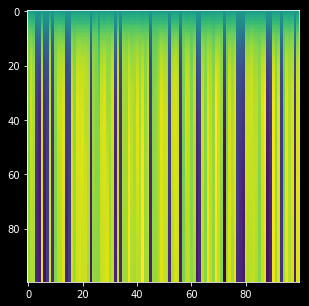

In [14]:
# Hid unit biases (b)
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.imshow(bb2nd[:, :, 0])

(100, 400)


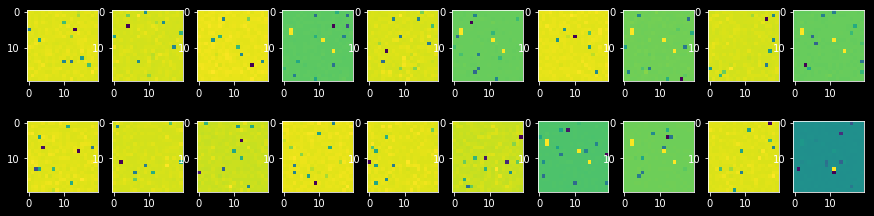

In [11]:
plt.rcParams['figure.figsize'] = (15.0, 20.0)
wijs2nd = W_ijs2nd[-1, :, :].T
print(wijs2nd.shape)
for i in range(20):
    plt.subplot(10, 10, i+1)
    plt.imshow(wijs2nd[i].reshape(20, 20))

wijs2nd shape = (100, 400)
wijs1st shape = (400, 1600)


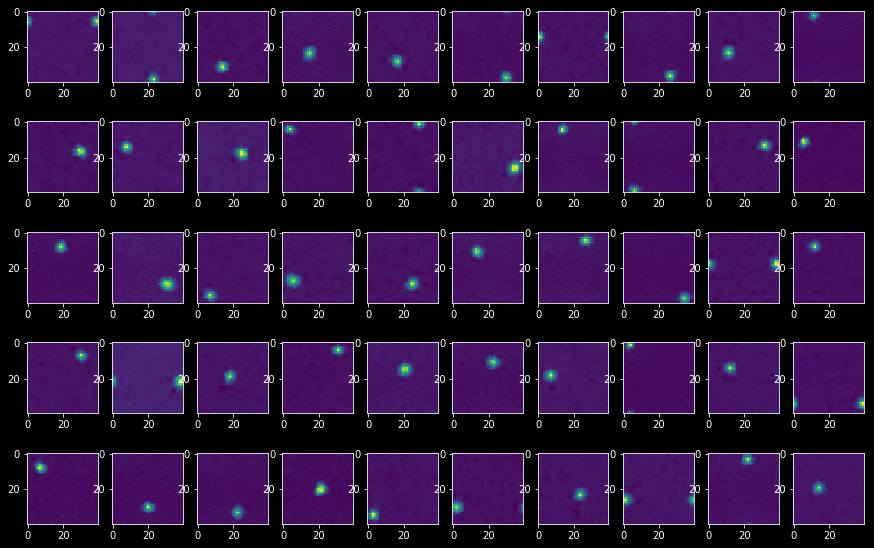

In [12]:
# reconstruction of full receptor fields
recept2nd = []
print("wijs2nd shape = " + str(wijs2nd.shape))
print("wijs1st shape = " + str(wijs1st.shape))
for i in range(n_h2):
  r2 = (1. / 400) * np.dot(wijs2nd[i, :], wijs1st)
  recept2nd.append(r2)

plt.rcParams['figure.figsize'] = (15.0, 20.0)
for i in range(50):
    plt.subplot(10, 10, i+1)
    plt.imshow(recept2nd[i].reshape(40, 40))
  

### Third layer RBM

In [56]:
# data for input to< 3rd layer RBM
data3rd = rbm2nd.vToh(data2nd)
# setup 2nd RBM
numSamp, batchSize, n_v3, n_h3 = dataOrig.shape[0], 100, 100, 25
rbm3rd = RBM(n_v3, n_h3, numSamp, batchSize)
# TODO: do an SMO over these parameters
# numEpochs, learnRate, regWeight, mom, logInt = 100, 0.1, 0.008, 0.6, 1
numEpochs, learnRate, regWeight, mom, logInt = 100, 0.2, 0.0008, 0.9, 1

In [57]:
# train for numEpochs, at learnRate
W_ijs3rd, aa3rd, bb3rd = rbm3rd.train(data3rd, numEpochs, learnRate, True, True, True, regWeight, mom, logInt)

Epoch: (/100): 

0 

1 

2 

3 

4 

5 

6 

7 

8 

9 

10 

11 

12 

13 

14 

15 

16 

17 

18 

19 

20 

21 

22 

23 

24 

25 

26 

27 

28 

29 

30 

31 

32 

33 

34 

35 

36 

37 

38 

39 

40 

41 

42 

43 

44 

45 

46 

47 

48 

49 

50 

51 

52 

53 

54 

55 

56 

57 

58 

59 

60 

61 

62 

63 

64 

65 

66 

67 

68 

69 

70 

71 

72 

73 

74 

75 

76 

77 

78 

79 

80 

81 

82 

83 

84 

85 

86 

87 

88 

89 

90 

91 

92 

93 

94 

95 

96 

97 

98 

99 
Done


In [15]:
np.savez_compressed("data/couplingsL3.npz", W_ijs3rd, aa3rd, bb3rd)

In [ ]:
# Vis unit biases (a)
plt.rcParams['figure.figsize'] = (20.0, 20.0)
for i in range(aa3rd.shape[0]):
  plt.subplot(20, 10, i+1)
  plt.imshow(aa3rd[i, :, 0].reshape(10, 10))

In [ ]:
# Hid unit biases (b)
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.imshow(bb3rd[:, :, 0])

(25, 100)


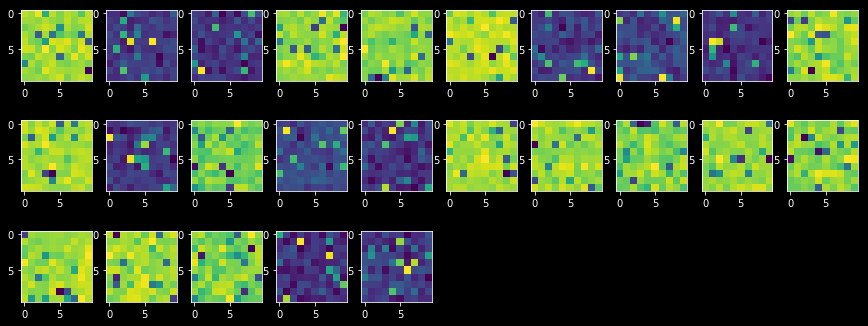

In [58]:
plt.rcParams['figure.figsize'] = (15.0, 20.0)
wijs3rd = W_ijs3rd[-1, :, :].T
print(wijs3rd.shape)
for i in range(25):
    plt.subplot(10, 10, i+1)
    plt.imshow(wijs3rd[i].reshape(10, 10))

wijs3rd shape = (25, 100)
wijs2nd shape = (100, 400)


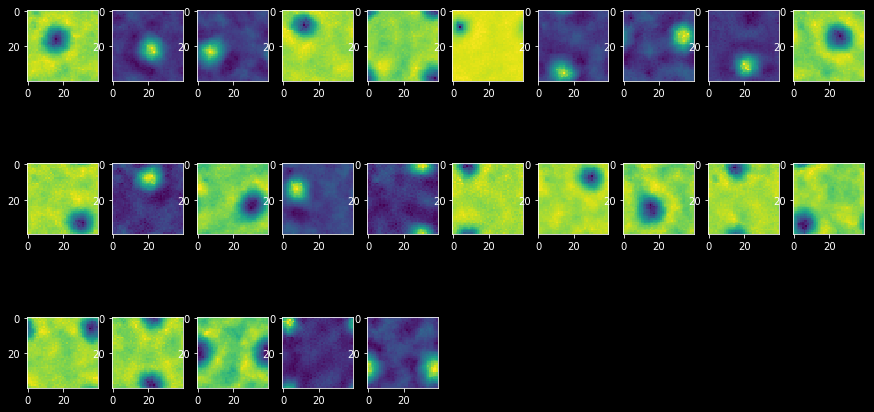

In [59]:
# reconstruction of full receptor fields
recept3rd = []
print("wijs3rd shape = " + str(wijs3rd.shape))
print("wijs2nd shape = " + str(wijs2nd.shape))
for i in range(n_h3):
  r3 = (1. / 40000) * np.dot(np.dot(wijs3rd[i, :], wijs2nd), wijs1st)
  recept3rd.append(r3)

plt.rcParams['figure.figsize'] = (15.0, 8.0)
for i in range(25):
    plt.subplot(3, 10, i+1)
    plt.imshow(recept3rd[i].reshape(40, 40))
  

## Reconstruct data

Not sure if I'm doing the reconstruction right

In [141]:
# will construct first 5 data points
dataF1 = np.copy(data[:, :5])

# dataFFin should be 25 entries
dataF2 = rbm1st.vToh(dataFwd1st)
dataF3 = rbm2nd.vToh(dataFwd2nd)
dataFFin = rbm3rd.vToh(dataFwd3rd)

In [142]:
# reconstruction
# NB: previously I was just using dataReconONE below, which only gave the low freq part of the 
#     reconstruction. adding dataReconTWO and dataReconTHREE gives the higher freq components
dataReconONE = np.dot(wijs1st.T, np.dot(wijs2nd.T, np.dot(wijs3rd.T, dataFFin))).reshape((40, 40, 5))
dataReconTWO = np.dot(wijs1st.T, np.dot(wijs2nd.T, dataF3)).reshape((40, 40, 5))
dataReconTHREE = np.dot(wijs1st.T, dataF2).reshape((40, 40, 5))

# Not sure about the numerical weighting factors here...
dataRecon = dataRecon1st + 100 * dataReconTWO + 400 * 100 * dataReconTHREE

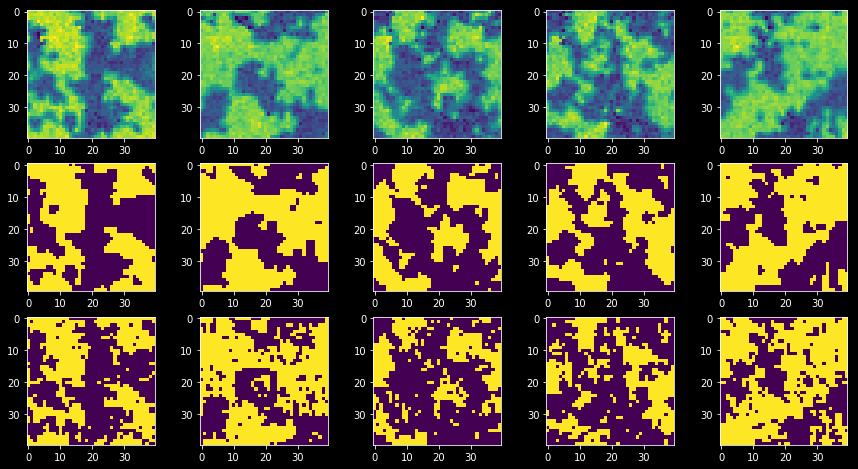

In [146]:
for i in range(5):
  # reconstructed samples
  plt.subplot(3, 5, i+1)
  plt.imshow(dataRecon[:, :, i])
  # reconstructed samples binarized
  plt.subplot(3, 5, i+6)
  plt.imshow(dataRecon[:, :, i] > 0)
  # original samples
  plt.subplot(3, 5, i+11)
  plt.imshow(dataF1[:, i].reshape(40, 40))

## TODO: Implement below

NameError: name 'rbm' is not defined

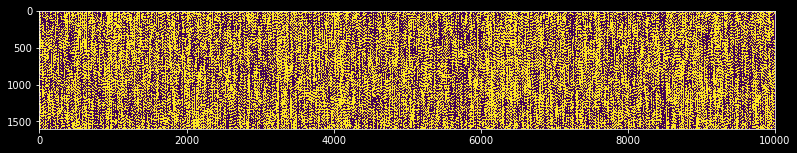

NameError: name 'rbm' is not defined

In [97]:
plt.rcParams['figure.figsize'] = (29.0, 20.0.reshape(40, 40))
plt.subplot(1, 2, 1)
plt.imshow(data)

dataCop2=np.zeros(data.shape)
np.copyto(dataCop2, data)
hidActs = rbm.vToh(dataCop2)
plt.subplot(1, 2, 2)
plt.imshow(hidActs)